# <div style="text-align: left">HEART FAILURE ANALYSIS - PYTHON</div>
## <div style="text-align: left">Heart Failure</div>
<div style="text-align: left">Heart failure happens when the heart cannot pump enough blood and oxygen to support other organs in your body. Heart failure is a serious condition, but it does not mean that the heart has stopped beating. 
Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worlwide. Heart failure is a common event caused by CVDs</div>




## <div style="text-align: left">About the Dataset </div>
<div style="text-align: left">This dataset contains 12 features that can be used to predict mortality by heart failure.
Most cardiovascular diseases can be prevented by addressing behavioural risk factors such as tobacco use, unhealthy diet and obesity, physical inactivity and harmful use of alcohol using population-wide strategies.
People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help</div>

# Importing Relevant Libraries for analysis:

In [1]:
#Data Wrangling:
import numpy as np
import pandas as pd

#Data Visualization:
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

# Workflow Stage 1: Data Importation

In [2]:
df = pd.read_csv('../input/heart-failure-clinical-data/heart_failure_clinical_records_dataset.csv')
df.head(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1


In [3]:
df.shape

(299, 13)

## Meaning of Variables:

Age - Self Explanatory

Anaemia - Is 1 or 0 with 1 being the patient does have this condition.
Anemia is a condition in which you lack enough healthy red blood cells to carry adequate oxygen to your body's tissues.

Creatinine Phosphokinase - Level of CPK enzyme in the blood

Diabetes - Is a 1 or 0 - whether the patient suffers from diabetes or not - similar to anaemia

Ejection Fraction - Is a percentage (numerical between 0 to 100)
Ejection fraction is a measurement of the percentage of blood leaving your heart each time it contracts.

High Blood Pressure - Is a 1 or 0 - whether patient suffers from high blood pressure

Platelets - no. of platelets in the blood

Serum Creatine - Level of Creatine produced from the kidneys in the blood

Serum Sodium - Level of Sodium in the blood

Sex - Self Explanatory - assuming 1 is male and 0 is female

Smoking - Self Explanatory - assuming 1 is smokes and 2 is doesn't smoke

Time - Follow up days

Death Event - whether patient died during follow up period

## What sort of datatypes do we have?

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


We can see all features are numerical variables

## Assessing for null-values:

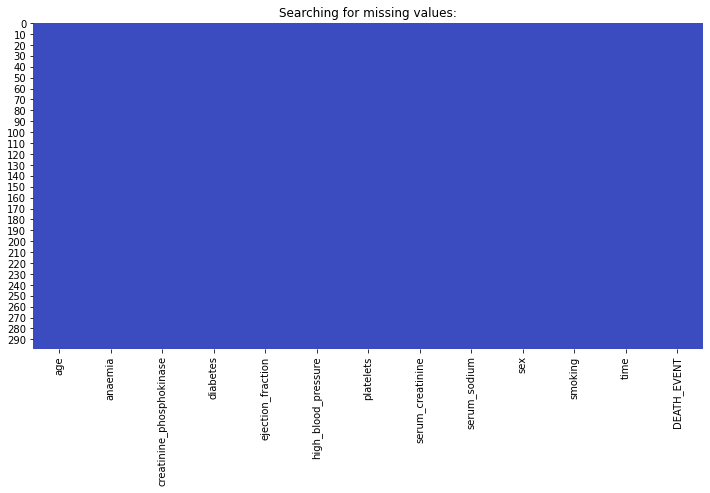

In [5]:
plt.figure(figsize=(12,6))
plt.title('Searching for missing values:')
sns.heatmap(data=df.isnull(),cmap = 'coolwarm', cbar = False)

We have completely filled data - that's not to say however that we don't have any outliers!

## What types of features do we have?

Continuous: Age, CPK, Ejection Fraction, Platelets, Serum Creatine, Serum Sodium and Time

Categorical: Anaemia, Diabetes, High Blood Pressue, Sex, Smoking, Death Event

We do not have any variables with mixed data types.

## Looking for features which may contain errors/typos

In [6]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


### Conclusions:

1. We seem to have outliers for CPK - since the max value is way higher than expected from the 75% quartile. With the same reasoning, this is the same for Platelets (+ fact that min is 25100) and Serum Creatinine and ejection fraction and possibly time. These need to be corrected
2. The remaining variables: Continuous (Age, Serum Sodium, Time) and Categoricals (remaining 5 variables) are fine - in total we've accounted for all 12 variables - excluding Death Event.

Aside from this:
1. 96 of the 299 (32%) patients in the sample passed away

## Assessing the distribution of the features:

## Continuous Features:

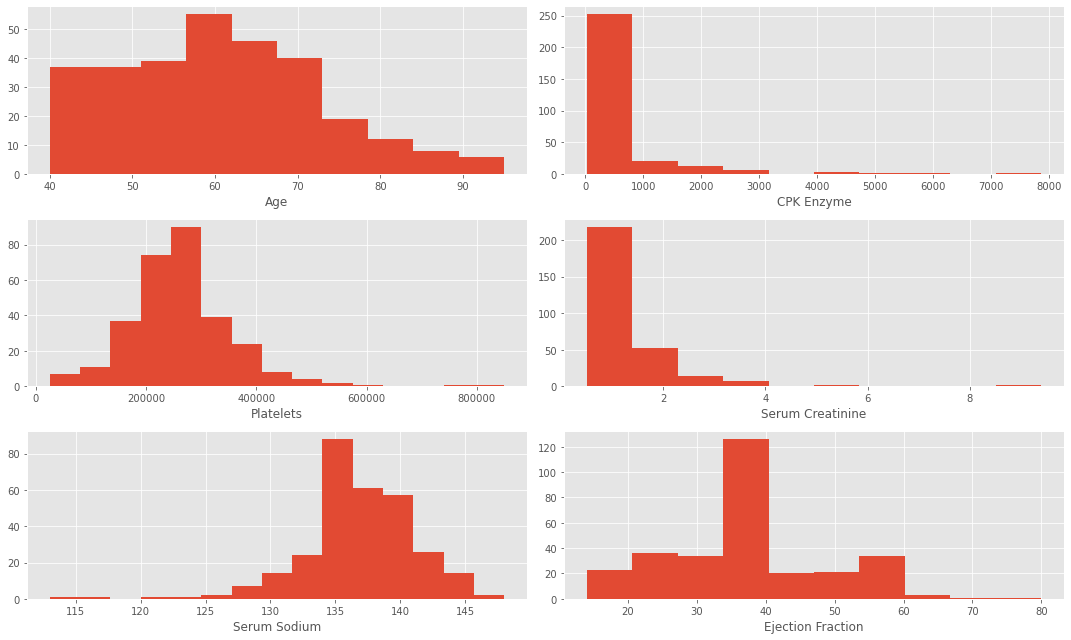

In [7]:
plt.style.use('ggplot')
fig, axis  = plt.subplots(nrows = 3, ncols = 2, figsize = (15,9))

ax0, ax1, ax2, ax3, ax4, ax5 = axis.flatten()

ax0.hist(df['age'])
ax0.set_xlabel('Age')

ax1.hist(df['creatinine_phosphokinase'])
ax1.set_xlabel('CPK Enzyme')

ax2.hist(df['platelets'], bins = 15)
ax2.set_xlabel('Platelets')

ax3.hist(df['serum_creatinine'])
ax3.set_xlabel('Serum Creatinine')

ax4.hist(df['serum_sodium'], bins = 15)
ax4.set_xlabel('Serum Sodium')

ax5.hist(df['ejection_fraction'])
ax5.set_xlabel('Ejection Fraction')

plt.tight_layout()

### Conclusions:

- The majority of patients were aged between 50-65 - with around a third of patients above 65 
- Our remarks from above regarding the possibility of outliers have been confirmed as shown by the plots for the CPK enzyme, platelet counts, creatinine, sodium and ejection fraction
- Most patients CPK in fact were below 1000
- Serum Creatinine was less than 2 (>75%)
- Platelets varied between 150K-400K
- Sodium varied between 132-142
- Ejection Fraction varied significantly amongst patients with some as low as 15% as high as 55% excluding outliers

## Now looking at distributions of the categorical variables:

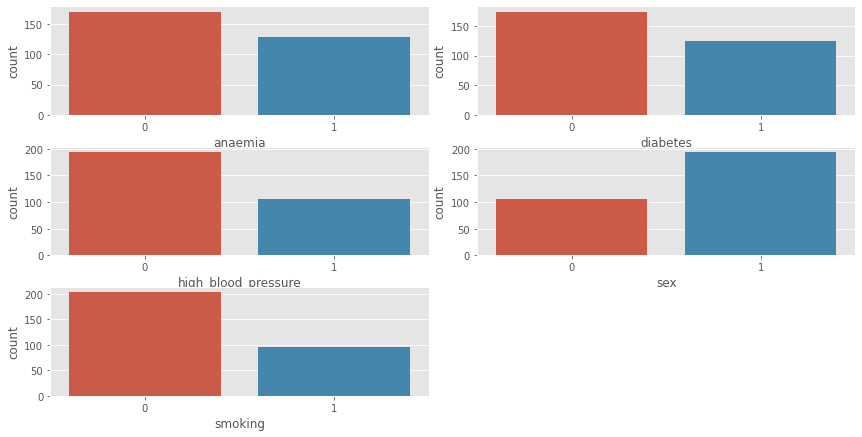

In [8]:
fig, ax  = plt.subplots(nrows = 3, ncols = 2, figsize = (12,6))
plt.tight_layout()
sns.countplot(df['anaemia'], ax=ax[0,0])
sns.countplot(df['diabetes'], ax=ax[0,1])
sns.countplot(df['high_blood_pressure'], ax=ax[1,0])
sns.countplot(df['sex'], ax=ax[1,1])
sns.countplot(df['smoking'], ax=ax[2,0])
fig.delaxes(ax[2,1])

In [9]:
x1 = (len(df[df['anaemia'] == 1]))/len(df['anaemia'])
x2 = (len(df[df['diabetes'] == 1]))/len(df['diabetes'])
x3 = (len(df[df['high_blood_pressure'] == 1]))/len(df['high_blood_pressure'])
x4 = (len(df[df['sex'] == 1]))/len(df['sex'])
x5 = (len(df[df['smoking'] == 1]))/len(df['smoking'])

data = {'Anaemia': x1, 'Diabetes': x2, 'High Blood Pressure': x3, 'Sex': x4, 
       'Smoking': x5}
categ_zeros = pd.DataFrame(data, index=[1])
categ_zeros

,Anaemia,Diabetes,High Blood Pressure,Sex,Smoking
1,0.431438,0.41806,0.351171,0.648829,0.32107


## Conclusion:

- The majority of patients in this sample (65%) are male by assumption that 1 = Male
- Around a third of patients suffered from either High Blood Pressure, Smoking or both
- Around 40% of the sample either had anaemia or diabeters or both too.

### Assumptions based on data analysis

We arrive at following assumptions based on data analysis done so far. We may validate these assumptions further before taking appropriate actions.

**Completing.**

- No variables require completing

**Correcting.**

1. We may want to correct the above mentioned variables in the event we find that there is some correlation with survival


**Creating.**

1. We may want create bands for age given that patients become more vulnerable as the get older.
2. Given how broad the time feature is in terms of values - we may want to also create a band for this if there is indeed a relationships with survival
3. We may want to create a new column denoting whether the patient had any sort of underlying condition i.e. anaemia, diabetes or high blood pressure

**Classifying.**

Additional assumptions:

1. Women may have higher chances of survival than men
2. Those who had less time in follow up days had higher chances of survival
3. Those who were younger than a certain age had higher chances of survival

## Analyzing relationships between survival and categorical variables via grouping:

In [10]:
df[['sex', 'DEATH_EVENT']].groupby(['sex'], as_index = False).mean()

,sex,DEATH_EVENT
0,0,0.323810
1,1,0.319588


In [11]:
df[['smoking', 'DEATH_EVENT']].groupby(['smoking'], as_index = False).mean()

,smoking,DEATH_EVENT
0,0,0.325123
1,1,0.312500


In [12]:
df[['anaemia', 'DEATH_EVENT']].groupby(['anaemia'], as_index = False).mean()

,anaemia,DEATH_EVENT
0,0,0.294118
1,1,0.356589


In [13]:
df[['diabetes', 'DEATH_EVENT']].groupby(['diabetes'], as_index = False).mean()

,diabetes,DEATH_EVENT
0,0,0.321839
1,1,0.320000


In [14]:
df[['high_blood_pressure', 'DEATH_EVENT']].groupby(['high_blood_pressure'], 
                                                   as_index = False).mean()

,high_blood_pressure,DEATH_EVENT
0,0,0.293814
1,1,0.371429


## Conclusions:

What we notice here is that there does not seem to be any correlation between  whether the patients had any underlying health conditions, their sex or whether they smoked against whether they died or not.
In conclusion we can say assumptions 1 and 4 made above are false.

Before we can discard these variables - it is best to see if we see if we can create a new feature out of these before dropping them. For example - we could create a new categorical feature denoting whether the patient has an underlying condition or not (diabetes, anaemia, high blood pressure). For sex and smoking - it seems so that we should drop them but before we do this, we do so we should check for underlying relationships with numerical variables.

## Analyzing relationships between survival and numerical variables:

Firstly a heatmap will come in very useful.

We immediately notice that there appears to be correlation between death with either age, no. of follow up days, ejection fraction and serum sodium.

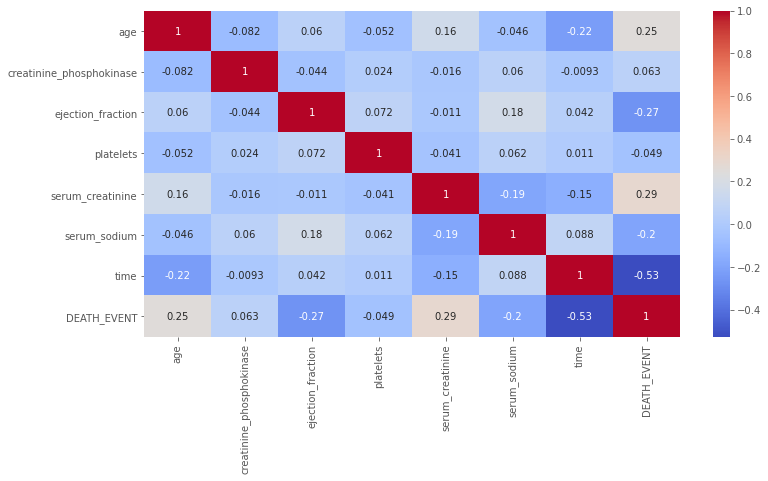

In [15]:
plt.figure(figsize = (12,6))
sns.heatmap(df[['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time', 'DEATH_EVENT']].corr(), cmap = 'coolwarm', annot = True)

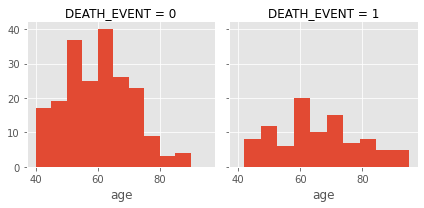

In [16]:
g = sns.FacetGrid(df, col = 'DEATH_EVENT')
g.map(plt.hist, 'age')

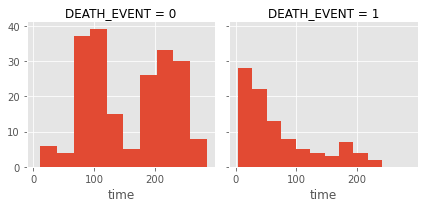

In [17]:
g = sns.FacetGrid(df, col = 'DEATH_EVENT')
g.map(plt.hist, 'time')

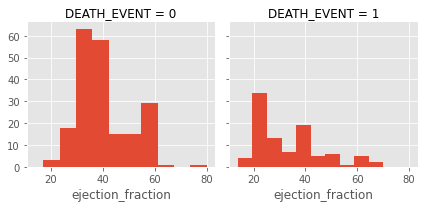

In [18]:
g = sns.FacetGrid(df, col = 'DEATH_EVENT')
g.map(plt.hist, 'ejection_fraction')

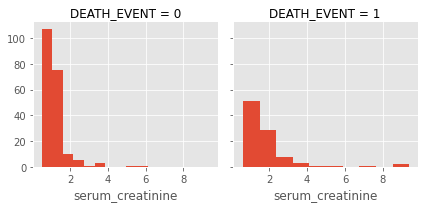

In [19]:
g = sns.FacetGrid(df, col = 'DEATH_EVENT')
g.map(plt.hist, 'serum_creatinine')

## Conclusions: 

1. Those over 70 had higher chances of dying, whilst many under 50 had higher chances of surival suggesting the need to band ages. So assumption #3 is true!
2. Those with a larger amount of follow up days tended to survive whilst those with less (<50) ended up with a higher mortality - for model building purposes we would like to band this too. This was in fact the opposite our assumption #2.
3. With regards to the ejection fraction, what we can see it that with high percentages had lower deaths. Those with lower percentages (<30%) had more deaths - again suggesting that we should create some bands.
4. Patients with higher creatinine levels suffered more deaths whist the vast majority (75%) who had percentages less than 1.4 has greater survival rates.
5. Platelets and CPK enzymes do not seem to have an effect with survival as well as with other variables - it makes sense to drop these

We can conclude that we have 4 numerical features which are all useful for our model building and that these features need to be sorted out in terms of outliers should they contain any. We would also like to create bands on the four of these.

# Analyzing relationships between categorical and numerical variables:

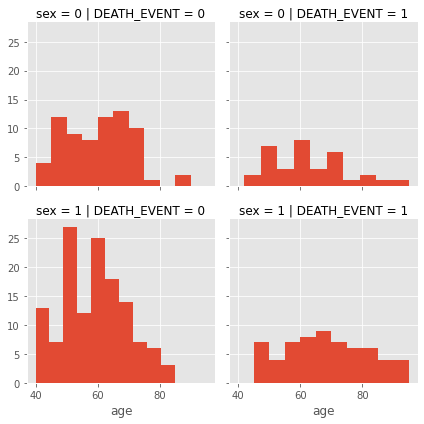

In [20]:
g = sns.FacetGrid(df, col = 'DEATH_EVENT', row = 'sex')
g.map(plt.hist, 'age')

## Conclusion

1. Looking at the plot above - for smoking against the age - we either don't see much relationship or we reach similar conclusions from above even when we split into whether a patient smokes or not - the same can be said for smoking against the other 3 relevant numerical variables. This means assumption #1 is false.
2. The same can be said for sex - overall this strengthens our case for dropping the two variables.

# Data Wrangling:

1. From the above - we have overall said that our only useful features at the moment are: age, time, serum creatinine and the ejection fraction. 
2. At the same time we have said that we can create a new column denoting whether a patient has any underlying condition whether it be anaemia, high blood pressure or diabetes.
3. The remaining features can be dropped

So all we need to do is create the new feature - assess how useful it is and decide whether we need to drop this, we need to fix for outliers for our useful features and drop the relevant features we no longer require before we can begin the prediction stage. We also need to band relevant features too.

## Feature Dropping:

In [21]:
print("Before", df.shape)
df = df.drop(['platelets', 'creatinine_phosphokinase', 'serum_sodium', 'sex', 'smoking'], axis = 1)
print("After", df.shape)

Before (299, 13)
After (299, 8)


## Creating new underlying condion column (UnderCon):

In [22]:
df['UnderCon'] = 0
df.loc[((df['anaemia'] == 1) | (df['diabetes'] == 1) | df['high_blood_pressure'] == 1), 'UnderCon'] = 1
df.drop(['anaemia', 'diabetes', 'high_blood_pressure'], axis = 1, inplace = True)
df.head()

,age,ejection_fraction,serum_creatinine,time,DEATH_EVENT,UnderCon
0,75.0,20,1.9,4,1,1
1,55.0,38,1.1,6,1,0
2,65.0,20,1.3,7,1,0
3,50.0,20,1.9,7,1,1
4,65.0,20,2.7,8,1,1


In [23]:
df.shape

(299, 6)

In [24]:
df[['DEATH_EVENT', 'UnderCon']].groupby('UnderCon', as_index = False).mean()

,UnderCon,DEATH_EVENT
0,0,0.283582
1,1,0.331897


## Conclusion:

There doesn't appear to be any correlation here, so we can just go ahead and drop this leaving us with our 4 main features to use in our model training - now we just need to deal with our outliers.

In [25]:
df = df.drop('UnderCon', axis = 1)

In [26]:
df.head()

,age,ejection_fraction,serum_creatinine,time,DEATH_EVENT
0,75.0,20,1.9,4,1
1,55.0,38,1.1,6,1
2,65.0,20,1.3,7,1
3,50.0,20,1.9,7,1
4,65.0,20,2.7,8,1


## Outlier Removal

As mentioned at the beginning of the analysis - considering the remaining features we have left - the ones that contain possible outliers are ejection fraction, time and serum creatinine

Text(0.5, 1.0, 'time')

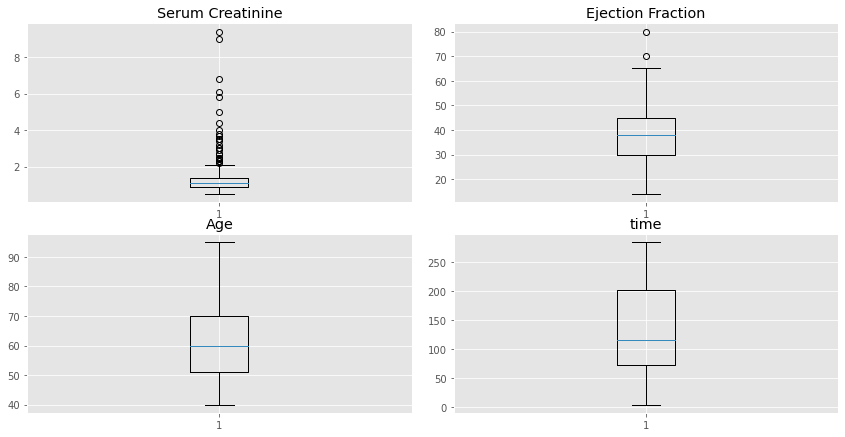

In [27]:
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (12,6))
plt.tight_layout()

ax0,ax1,ax2,ax3 = ax.flatten()

ax0.boxplot(df['serum_creatinine'])
ax0.set_title('Serum Creatinine')

ax1.boxplot(df['ejection_fraction'])
ax1.set_title('Ejection Fraction')

ax2.boxplot(df['age'])
ax2.set_title('Age')

ax3.boxplot(df['time'])
ax3.set_title('time')

## Conclusion:

Before we even go about removing outliers we need to understand typical values for these features - one just can't remove outliers! 

For example - the ejection fraction of a healthy person is typically between 50 -70% so a patient having a percentage between 70-80% which was once thought as an outlier isn't necessarily even though the boxplot suggests this. 

For Serum Creatinine - it seems there are very large values distant from the rest of the datapoints suggesting the existence of outliers (in this case values larger than say 3.5.) - to correct this - we'll replace values larger than 4 with the median of the rest of the values. 
NOTE - whilst the outliers occur at values higher than around 2 rather than 3.5 as shown by the boxplot and using the fact that the internet says a normal human being has level at around 1.2 - I could have removed all those outliers after 2 - however I took into account that there may be some patients with underlying heart conditions not taken into account by the data.

We have no outliers for Age and Time.

Hence, we only need to fix values for serum creatinine levels.

In [28]:
serum_cmode = df['serum_creatinine'].median()
df.loc[(df['serum_creatinine'] > 4), 'serum_creatinine'] = serum_cmode
df.head(10)

,age,ejection_fraction,serum_creatinine,time,DEATH_EVENT
0,75.0,20,1.9,4,1
1,55.0,38,1.1,6,1
2,65.0,20,1.3,7,1
3,50.0,20,1.9,7,1
4,65.0,20,2.7,8,1
5,90.0,40,2.1,8,1
6,75.0,15,1.2,10,1
7,60.0,60,1.1,10,1
8,65.0,65,1.5,10,1
9,80.0,35,1.1,10,1


## Banding features:

Age

- As we can see banding was effective - we see clear correlation!

In [29]:
df['AgeBand'] = pd.cut(df['age'],5)
df[['AgeBand', 'DEATH_EVENT']].groupby('AgeBand', as_index = False).mean()

,AgeBand,DEATH_EVENT
0,"(39.945, 51.0]",0.256410
1,"(51.0, 62.0]",0.273684
2,"(62.0, 73.0]",0.294118
3,"(73.0, 84.0]",0.555556
4,"(84.0, 95.0]",0.714286


In [30]:
#Mapping:

df.loc[df['age'] <= 51, 'age'] = 0
df.loc[(df['age'] > 51) & (df['age'] <= 62), 'age'] = 1
df.loc[(df['age'] > 62) & (df['age'] <= 73), 'age'] = 2
df.loc[(df['age'] > 73) & (df['age'] <= 84), 'age'] = 3
df.loc[(df['age'] > 84) & (df['age'] <= 95), 'age'] = 4

df.drop('AgeBand', axis = 1, inplace = True)

Time
- Similar Conclusion.

In [31]:
df['TimeBand'] = pd.cut(df['time'],5)
df[['TimeBand', 'DEATH_EVENT']].groupby('TimeBand', as_index = False).mean()

,TimeBand,DEATH_EVENT
0,"(3.719, 60.2]",0.857143
1,"(60.2, 116.4]",0.250000
2,"(116.4, 172.6]",0.289474
3,"(172.6, 228.8]",0.102941
4,"(228.8, 285.0]",0.047619


In [32]:
#Mapping:

df.loc[df['time'] <= 60.2, 'time'] = 0
df.loc[(df['time'] > 60.2) & (df['time'] <= 116.4), 'time'] = 1
df.loc[(df['time'] > 116.4) & (df['time'] <= 172.6), 'time'] = 2
df.loc[(df['time'] > 172.6) & (df['time'] <= 228.8), 'time'] = 3
df.loc[(df['time'] > 228.8) & (df['time'] <= 285), 'time'] = 4

df.drop('TimeBand', axis = 1, inplace = True)

Serum Creatinine
- Similar Conclusion.

In [33]:
df['SCBand'] = pd.cut(df['serum_creatinine'],5)
df[['SCBand', 'DEATH_EVENT']].groupby('SCBand', as_index = False).mean()

,SCBand,DEATH_EVENT
0,"(0.496, 1.2]",0.229268
1,"(1.2, 1.9]",0.484848
2,"(1.9, 2.6]",0.666667
3,"(2.6, 3.3]",0.571429
4,"(3.3, 4.0]",0.500000


In [34]:
#Mapping:

df.loc[df['serum_creatinine'] <= 1.2, 'serum_creatinine'] = 0
df.loc[(df['serum_creatinine'] > 1.2) & (df['serum_creatinine'] <= 1.9), 'serum_creatinine'] = 1
df.loc[(df['serum_creatinine'] > 1.9) & (df['serum_creatinine'] <= 2.6), 'serum_creatinine'] = 2
df.loc[(df['serum_creatinine'] > 2.6) & (df['serum_creatinine'] <= 3.3), 'serum_creatinine'] = 3
df.loc[(df['serum_creatinine'] > 3.3) & (df['serum_creatinine'] <= 4), 'serum_creatinine'] = 4

df.drop('SCBand', axis = 1, inplace = True)

Ejection Fraction
- Similar Conclusion.

In [35]:
df['EJBand'] = pd.cut(df['ejection_fraction'],5)
df[['EJBand', 'DEATH_EVENT']].groupby('EJBand', as_index = False).mean()

,EJBand,DEATH_EVENT
0,"(13.934, 27.2]",0.644068
1,"(27.2, 40.4]",0.243750
2,"(40.4, 53.6]",0.268293
3,"(53.6, 66.8]",0.189189
4,"(66.8, 80.0]",0.500000


In [36]:
#Mapping:

df.loc[df['ejection_fraction'] <= 27.2, 'ejection_fraction'] = 0
df.loc[(df['ejection_fraction'] > 27.2) & (df['ejection_fraction'] <= 40.4), 'ejection_fraction'] = 1
df.loc[(df['ejection_fraction'] > 40.4) & (df['ejection_fraction'] <= 53.6), 'ejection_fraction'] = 2
df.loc[(df['ejection_fraction'] > 53.6) & (df['ejection_fraction'] <= 66.8), 'ejection_fraction'] = 3
df.loc[(df['ejection_fraction'] > 66.8) & (df['ejection_fraction'] <= 80), 'ejection_fraction'] = 4

df.drop('EJBand', axis = 1, inplace = True)

### Converting age and serum creatinine to integers:

In [37]:
#Converting age and serum creatinine to integers:
df['age'] = df['age'].astype(int)
df['serum_creatinine'] = df['serum_creatinine'].astype(int)
df.head()

,age,ejection_fraction,serum_creatinine,time,DEATH_EVENT
0,3,0,1,0,1
1,1,1,0,0,1
2,2,0,1,0,1
3,0,0,1,0,1
4,2,0,3,0,1


# Modelling and Prediction:

This is a classification and a regression problem since we are predicting an output based off of other independent features. Furthermore - this is a supervised problem as we will have a training dataset to train our model against.

Possible models:
- Logistic Regression
- KNN or k-Nearest Neighbors
- Support Vector Machines
- Naive Bayes classifier
- Decision Tree
- Random Forrest
- Support Vector Machine

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, plot_confusion_matrix, f1_score,confusion_matrix, recall_score, precision_score

import seaborn as sns
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

In [39]:
train, test = train_test_split(df, test_size = 0.2, random_state = 42)
print(train.head())
print('_'*40)
print(test.head())

     age  ejection_fraction  serum_creatinine  time  DEATH_EVENT
6      3                  0                 0     0            1
183    3                  1                 2     2            1
185    1                  1                 1     2            1
146    1                  1                 0     1            0
30     4                  1                 1     0            1
________________________________________
     age  ejection_fraction  serum_creatinine  time  DEATH_EVENT
281    2                  1                 3     4            0
265    0                  1                 0     4            0
164    0                  1                 0     2            1
9      3                  1                 0     0            1
77     0                  1                 0     1            0


In [40]:
X_train = train.drop('DEATH_EVENT', axis = 1)
Y_train = train['DEATH_EVENT']
X_test = test.drop('DEATH_EVENT', axis=1).copy()
Y_test = test['DEATH_EVENT']

X_train.shape,Y_train.shape,X_test.shape, Y_test.shape

((239, 4), (239,), (60, 4), (60,))

## Logistic Regression

In [41]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)

acc_log_train = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log_test = round(accuracy_score(Y_pred, Y_test) * 100,2)

print('Training Score:',acc_log_train,'%')
print('-'*25)
print('Test Score:',acc_log_test,'%')

Training Score: 86.19 %
-------------------------
Test Score: 76.67 %


## Support Vector Machines

In [42]:
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)

acc_svc_train = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc_test = round(accuracy_score(Y_pred, Y_test) * 100,2)

print('Training Score:',acc_svc_train,'%')
print('-'*25)
print('Test Score:',acc_svc_test,'%')


Training Score: 88.7 %
-------------------------
Test Score: 73.33 %


## K Nearest-Neighhbours (KNN)

Minimum error:- 0.23333333333333334 at K = 11


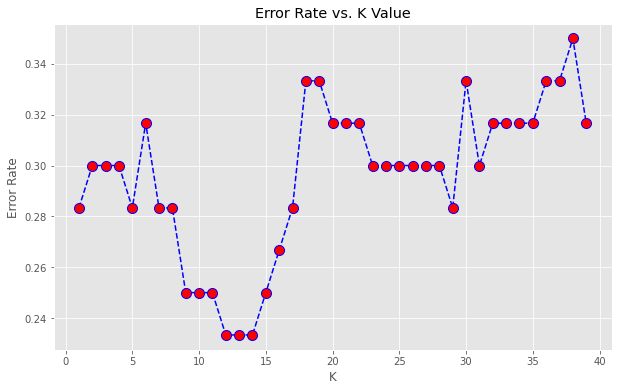

In [43]:
error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,Y_train)
 pred_i = knn.predict(X_test)
 error_rate.append(np.mean(pred_i != Y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

In [44]:
knn = KNeighborsClassifier(n_neighbors = error_rate.index(min(error_rate)))
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)

acc_knn_train = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn_test = round(accuracy_score(Y_pred, Y_test) * 100,2)

print('Training Score:',acc_knn_train,'%')
print('-'*25)
print('Test Score:',acc_knn_test,'%')

Training Score: 86.61 %
-------------------------
Test Score: 75.0 %


## Gaussian Naive-Bayes

In [45]:
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)

acc_gaussian_train = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian_test = round(accuracy_score(Y_pred, Y_test) * 100,2)

print('Training Score:',acc_gaussian_train,'%')
print('-'*25)
print('Test Score:',acc_gaussian_test,'%')

Training Score: 81.59 %
-------------------------
Test Score: 75.0 %


## Decision Tree

In [46]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)

acc_decision_tree_train = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree_test = round(accuracy_score(Y_pred, Y_test) * 100,2)

print('Training Score:',acc_decision_tree_train,'%')
print('-'*25)
print('Test Score:',acc_decision_tree_test,'%')

Training Score: 94.14 %
-------------------------
Test Score: 73.33 %


## Random Forest

In [47]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)

acc_random_forest_train = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest_test = round(accuracy_score(Y_pred, Y_test) * 100,2)

print('Training Score:',acc_random_forest_train,'%')
print('-'*25)
print('Test Score:',acc_random_forest_test,'%')

Training Score: 94.14 %
-------------------------
Test Score: 70.0 %


# Model Evaluation:

## Score under the training set:

In [48]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes','Decision Tree'],
              
             
    'Score': [acc_svc_train, acc_knn_train, acc_log_train, 
              acc_random_forest_train, acc_gaussian_train, 
              acc_decision_tree_train]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,94.14
5,Decision Tree,94.14
0,Support Vector Machines,88.70
1,KNN,86.61
2,Logistic Regression,86.19
4,Naive Bayes,81.59


## Score under the test set:

In [49]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes','Decision Tree'],
              
    'Score': [acc_svc_test, acc_knn_test, acc_log_test, 
              acc_random_forest_test, acc_gaussian_test, 
              acc_decision_tree_test]})
models.sort_values(by='Score', ascending=False)

,Model,Score
2,Logistic Regression,76.67
1,KNN,75.00
4,Naive Bayes,75.00
0,Support Vector Machines,73.33
5,Decision Tree,73.33
3,Random Forest,70.00


### Lets choose to continue with Logistic Regression model as it has best score in the test set.


# confusion matrix:

Text(33.0, 0.5, 'True labels')

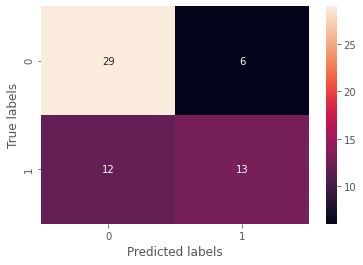

In [50]:
cm = confusion_matrix(Y_test, Y_pred)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax)

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')

### We deal with imbalanced classification problem so maybe accuracy is not the best metric. Let's try f1-score,precision and recall and see results


In [51]:
print('Logistic Regression f1-score', round(f1_score(Y_test, Y_pred) * 100,2),'%')
print('Logistic Regression precision', round(precision_score(Y_test, Y_pred)* 100,2),'%')
print('Logistic Regression recall', round(recall_score(Y_test, Y_pred)* 100,2),'%')

Logistic Regression f1-score 59.09 %
Logistic Regression precision 68.42 %
Logistic Regression recall 52.0 %


### Let's try to improve our metrics and use LightGBM model

In [52]:
model = LGBMClassifier(random_state=0)
model.fit(X_train, Y_train)
preds = model.predict(X_test)
print('LightGBM f1-score', round(f1_score(Y_test, preds) * 100,2),'%')
print('LightGBM precision', round(precision_score(Y_test, preds)* 100,2),'%')
print('LightGBM recall', round(recall_score(Y_test, preds)* 100,2),'%')

LightGBM f1-score 69.77 %
LightGBM precision 83.33 %
LightGBM recall 60.0 %


### Let's try to improve our f1-score and use XGBoost model

In [53]:
model = XGBClassifier(random_state=0)
model.fit(X_train, Y_train)
preds = model.predict(X_test)
print('XGBClassifier f1-score', round(f1_score(Y_test, preds)*100,2),'%')
print('XGBClassifier precision', round(precision_score(Y_test, preds)* 100,2),'%')
print('XGBClassifier recall', round(recall_score(Y_test, preds)* 100,2),'%')

XGBClassifier f1-score 59.09 %
XGBClassifier precision 68.42 %
XGBClassifier recall 52.0 %


### we see that with LightGBM we got the best results.

# Conclusions:

- There is clear room for improvement if we can adjust hyperparameters optimization or recursive feature elimination (currently unsure of how to do this with current knowledge)

    
